<a href="https://colab.research.google.com/github/Madhu317/Intro-to-TensorFlow/blob/main/tf2_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install Dependencies
#get your dependencies on
!pip install -U kora
#!pip install tf-nightly
!pip install seaborn
!pip install tensorflow_hub

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.9.6)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#%tensorflow_version 1.x

In [ ]:
tf.__version__

'2.5.0-dev20201111'

#Setup

Alright! Before we get started let's check we have a GPU available as it'll dramatically improve our training and inference time. Mak sure that **Hardware Accelarator** option in  **Runtime - Change Runtime Type** is set to GPU.

GPU's started life as single operation multiple data powerhouse. Workhorse dedicated to vector translation, rasterisation, convolutions etc It quickly became apparent in our lifetimes that the SIMD paradigm can be utilised in conjunction with Deep Learning and we're beginning to see hardware become more and more specialised as a result.

Let's actually take the opportunity investigate first of all whether a GPU is available to us and also which model:


In [ ]:
#check wether or not we're using a GPU
is_gpu = len(tf.config.experimental.list_physical_devices('GPU')) > 0
print(is_gpu)

True


In [ ]:
!nvidia-smi

Thu Nov 12 11:19:37 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

We're pretty lucky here in that Collaboratory is able to offer us Tesla K80's to work with subject to demaand. For those of you who are lucky enough to have Colab Pro, access to P100's and V100's is a dream with the latter offering a huge performance enhacement with dedicated mixed precision tensor cores.

# Our first model
ANN's are easy to build with Keras' high-level API and a Tensorflow backend. Since Tensorflow 2 Keras has become it's official high level API. While the API provides us with a fucntional approach for advanced usage a sequential approach is also available to help visualise the layers of you nn. Let's stick with that approach for now.


The beautiful thing about Tensorflow 2 is that is uses eager execution for a better control flow, allowing us to evaluate operations immediately instead of having to build graphs, whilst retaining the ability to do so on the fly with some handy decorators.

Let's invesitgate these concepts by revisiting the XOR problem. 

# The Perceptron



![perceptron](https://www.simplilearn.com/ice9/free_resources_article_thumb/general-diagram-of-perceptron-for-supervised-learning.jpg)



In [ ]:
#Heaveside step function is super simple
def predict(X):
        return 1 * (X > 0)
        #return np.where(X >= 0.0, 1, 0)

In [ ]:
#What are these?
X = np.array([[0, 0], [0, 1], [1,0], [1, 1]])

gates = {'OR': np.array([0,1,1,1]),
         'AND': np.array([0,0,0,1]),
         'XOR': np.array([0,1,1,0])}

In [ ]:
#let's go sklearn!
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier

h = .02  # step size in the mesh
perceptron = Perceptron(max_iter=1000, eta0=0.1).fit(X, gates['OR'])
random_forest = RandomForestClassifier(random_state=1, n_estimators=100).fit(X,gates['OR'])


In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])

print(Z)

[0 0 0 ... 1 1 1]


In [ ]:
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt



def plot_decision(X,y,model,size =(8,8), output_class = False):
  
  if model == 'perceptron':
    model = Perceptron(max_iter=1000, eta0=0.1).fit(X,y)

  elif model == 'random forest':
    model = RandomForestClassifier(random_state=1, n_estimators=100).fit(X,y)
 

 
  h = .02  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  fig, ax = plt.subplots(figsize=size)
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  #print(Z)
  
  if output_class:
    Z = Z >0.5

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  ax.contourf(xx, yy, Z)
  ax.axis('on')

  # Plot also the training points
  ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

gate = widgets.Dropdown(
    options=['OR','AND', 'XOR'],
    description='Choose data:',
)

model = widgets.Dropdown(
    options=['perceptron', 'random forest'],
    description='Choose data:',
)

out = widgets.Output()

def on_change(change):
    #print(change.new)
    with out:
      clear_output()
      plot_decision(X,gates[change.new],model.value)



#model.observe(on_change, names='value')
gate.observe(on_change, names='value')

display(gate)
display(model)
display(out)


Dropdown(description='Choose data:', options=('OR', 'AND', 'XOR'), value='OR')

Dropdown(description='Choose data:', options=('perceptron', 'random forest'), value='perceptron')

Output()

#Fully connected shallow networks

![shallow](https://i.stack.imgur.com/BVZro.png)

As mentioned earlier it has become pretty easy to work with Tensorflow on the fly without a pre-defined graph. Let's take a look!

In [ ]:
x = tf.constant([[123],[456]])

In [ ]:
print(x)s 

tf.Tensor(
[[123]
 [456]], shape=(2, 1), dtype=int32)


In [ ]:
x = tf.zeros((3,2))

In [ ]:
print(x)

tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


In [ ]:
#Let's create some dummy data


In [ ]:
#Weights and bias


Despite  we're still able to covert a custom function to it's graph representation with the super handy `@tf.function` decorator. Enabling a speedup with custom code. Any ideas how we'd go about creating a standard Dense layer given what we know about perceptrons?

**hint** - I'll get you started with `tf.matmul`

In [ ]:
#your code here


In [ ]:
#vanilla


In [ ]:
%%time
dense_layer(X, w1, b1)


1000 loops, best of 3: 370 µs per loop


In [ ]:
%%time
dense_layer_vanilla(X, w1, b1)

1000 loops, best of 3: 403 µs per loop


In [ ]:
#Relu


In [ ]:
#@title Activation functions
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
z = np.arange(-10, 10, .1)
zero = np.zeros(len(z))


y = np.max([zero, z], axis=0)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, y)
ax.set_ylim([-10, 10.0])
ax.set_xlim([-10, 10.0])
ax.grid(True)

ax.set_title('Rectified linear unit')

plt.show()


In [ ]:
import math

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10., 10., 0.2)

sigmoid  = [1/(1+math.exp(-i))for i in x]

ax = sns.lineplot(x=x, y=sigmoid)
ax.set_title('Sigmoid')

plt.show()

Let's move with using the high-level api for now but we'll revisit this notion later when we import modules from Tensorflow Hub 

In [ ]:
#Our first neural net!

In [ ]:
y = gates['XOR']

In [ ]:
mlp = tf.keras.Sequential()

In [ ]:
#Broken, care to fix it?
mlp.add(tf.keras.layers.Dense(16, input_dim=2, activation='relu'))
mlp.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
mlp.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss='binary_crossentropy',
    metrics=['accuracy']
    
)

In [ ]:
history = mlp.fit(X, y, batch_size=1, epochs=400, verbose=0)

In [ ]:
(mlp.predict(X) > 0.5).astype('int32')

array([[0],
       [1],
       [1],
       [0]], dtype=int32)

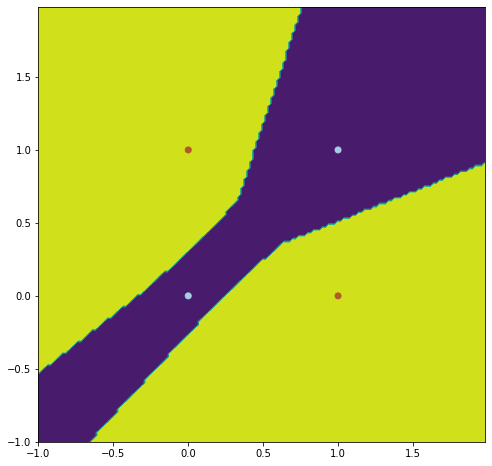

In [ ]:
plot_decision(X,y,mlp, output_class=True)

# Now it's your turn!

- I've provide you with your data here  - again a binary classification problem but one that'll really take advantage of an mlp's ability to navigate difficult shaped data.

In [ ]:
from sklearn.datasets import make_circles

X, targets = make_circles(n_samples = 1000, factor=0.1)
X_train = X[250:, :]
X_test = X[:250, :]
y_train = targets[250:]
y_test = targets[:250]

feature_vector = len(X_train[0])
input_shape = (feature_vector,)

In [ ]:
#Your code here 


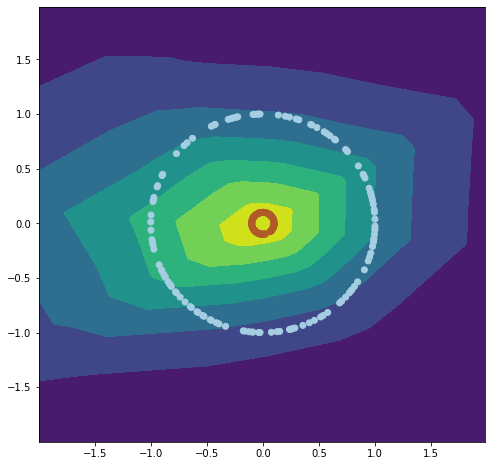

In [ ]:
plot_decision(X_test,y_test,circles, output_class=False)

In [ ]:
#What about the functional API?



#More data please!

In [ ]:
#mnist 

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

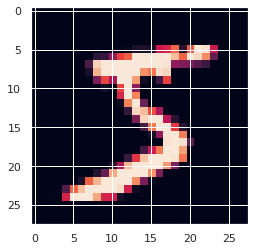

In [ ]:
plt.imshow(X_train[0])

We can think of digital images as the discrete pixel intensity at a specific  pixel location - **I(x,y)** Let's visualise it in 3D to get a better idea!

In [ ]:
import cv2

image = X_train[0]
inception = cv2.imread('/content/drive/My Drive/testing ground/toronto-ml/intro-to-tf2/images/inception2.jpg')
gray = cv2.cvtColor(inception, cv2.COLOR_BGR2GRAY)

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

def plot_3d(a,b, pic):

  xx, yy = np.mgrid[0:pic.shape[0], 0:pic.shape[1]]
  fig = plt.figure(figsize=(10,10))
  ax = fig.gca(projection='3d')
  ax.plot_surface(xx, yy, pic ,rstride=1, cstride=1, cmap=plt.cm.gray,linewidth=0.01)
  ax.view_init(a, b)

  plt.show()


def f(a, b, pic):
    plot_3d(a,b, pic)
    

In [ ]:
inception = interactive(f,pic=widgets.fixed(gray), a=80, b=30)
display(inception)

interactive(children=(IntSlider(value=80, description='a', max=240, min=-80), IntSlider(value=30, description=…

In [ ]:
mnist = interactive(f,pic=widgets.fixed(image), a=80, b=30)
display(mnist)

interactive(children=(IntSlider(value=80, description='a', max=240, min=-80), IntSlider(value=30, description=…

To classify inception posters or indeed specific objects regardless of the context of the poster we'd need something a little more complex like a convolutional neural network but for now let's look at how we can tackle something a little simpler and visit the classic mnist handwriting dataset

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
#Can you normalise the images and why do we go about doing this?


In [ ]:
#How about reshaping?


In [ ]:
train_images[0].shape

(784,)

Now it's over to you!

- Hints - you can avoid having to one hot encode your labels by using sparse catergorical as you loss.
- What about our last layer? Last time we were dealing with a binary classifiction problem so where are we headed here?
-let's also try implementing callbacks to help save time and resources with the sample code below:

In [ ]:
path = '/content/drive/My Drive/testing ground/toronto-ml/intro-to-tf2/models'

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
ms = tf.keras.callbacks.ModelCheckpoint(
    filepath=path,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
#your code here 


In [ ]:
history.history

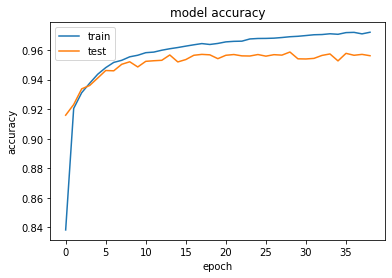

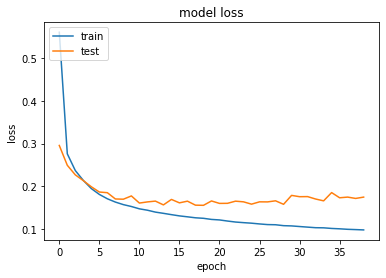

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = mnist.predict(test_images[:5])

print(np.argmax(predictions, axis=1))

[7 2 1 0 4]


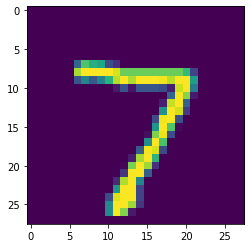

In [ ]:
plt.imshow(X_test[0])

In [ ]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

In [ ]:
class_names[np.argmax(predictions, axis=1)[0]]

'seven'

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[np.argmax(predictions_all, axis=1)[i]])
plt.suptitle('mnist', fontsize=14)
plt.show()

In [ ]:
#@title we can do more!

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
cg = tf.keras.callbacks.LambdaCallback(on_epoch_end=show_frame)
tb = tf.keras.callbacks.TensorBoard(log_dir='./logs')


####Your task is do tthe same with cifar10!###

In [ ]:
from IPython.display import clear_output

def show_frame(epoch, logs):
  clear_output(wait=True)


  predictions_all = cifar10.predict(test_images)


  plt.figure(figsize=(10,10))
  for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions_all, axis=1)[i]])
  plt.suptitle(f"Epoch: {epoch}", fontsize=14)
  plt.show()

  


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
cg = tf.keras.callbacks.LambdaCallback(on_epoch_end=show_frame)

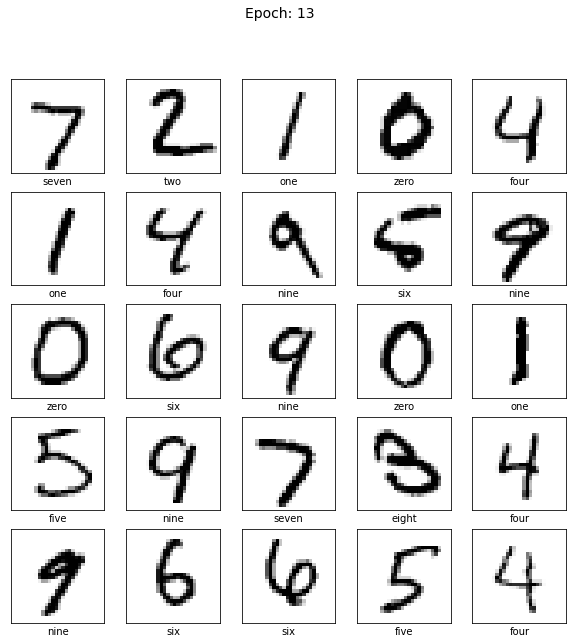

Epoch 00014: early stopping


In [ ]:
history = cifar10.fit(train_images, y_train, epochs=300, 
                    batch_size=64,
                    validation_data=(test_images, y_test),
                    callbacks=[es, cg],
                    verbose = 0)

#Let's take it even futher!

Head over to the bonus round notebook and let's take a look.

 We won't delve into fine-tuning a network this time around, but the whole basis is there for you to look at. Note that I've unfrozen every single for demonstration purposes

In [ ]:
# Create the base model from the pre-trained model VGG16


In [ ]:
base_model.summary()

In [ ]:
show_local_mp4_video('/content/drive/My Drive/testing ground/toronto-ml/intro-to-tf2/images/activations/all_layers_final.mp4')

In [ ]:
!pip install --upgrade IPython

Requirement already up-to-date: IPython in /usr/local/lib/python3.6/dist-packages (7.16.1)


In [ ]:
upload = False
from kora.drive import upload_public
from IPython.display import HTML

url = 'https://drive.google.com/uc?id=11eibnodv9AyJelpKSZZFUk-na0AHumEy'

if upload:
  url = upload_public('/content/drive/My Drive/testing ground/toronto-ml/intro-to-tf2/images/activations/all_layers_final.mp4')


HTML(f"""<video src={url} width=800 height=500 controls/>""")

#Don't stop me now!




We've been very visual so far as the second workshop will concentrate predominatly on Tensorflow Object Detection API in conjunction with Openvino,  but what about NLP another important problem domain in our day and age. Well this actually gives us a great opportunity to introduce Tensorflow Hub!

Intended as a way of leveraging pretrained models and parts on the fly, hub  offers us a pretty quick way to start working with text data and even fine-tune pre-exisiting models.

In [ ]:
#It's super easy to grab reusable pre-trained parts with Tensorflow Hub:

model = "https://tfhub.dev/google/nnlm-en-dim128/2"
embed = hub.KerasLayer(model, dtype=tf.string)



In [ ]:
#Can you finish up the interactive code below?

import ipywidgets as widget
from ipywidgets import interact
import tensorflow_hub as hub
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re


model_dirs = ["https://tfhub.dev/google/nnlm-en-dim128/2",
              "https://tfhub.dev/google/tf2-preview/nnlm-es-dim50-with-normalization/1",
              "https://tfhub.dev/google/universal-sentence-encoder/4"
              ]

def display_embed(phrases, model):
  #your code here 

  ########


  plot_similarity(phrases, embeddings, 90, model)
  #print(embeddings.shape)


def plot_similarity(labels, features, rotation, model):

  title = re.sub('https://tfhub.dev/google/', '', model)

  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title(title)
  plt.show()






In [ ]:
#Aha! otherewise we're importing parts with the @tf.function decorator and tracing is going to make a mess of things
tf.config.run_functions_eagerly(True)

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output


w = widgets.Dropdown(
    options=model_dirs,
    description='Model:',
)

input_text = widgets.Text(description = 'input one: ')
input_text2 = widgets.Text(description = 'input two: ')
input_text3 = widgets.Text(description = 'input three: ')



out = widgets.Output()

def on_change(change):
    #print(change.new)
    with out:
      clear_output()
      inputs = [input_text.value, input_text2.value, 
                input_text3.value]
    
      display_embed(inputs,change.new)



#model.observe(on_change, names='value')
w.observe(on_change, names='value')

display(input_text)
display(input_text2)
display(input_text3)
display(w)
display(out)

Text(value='', description='input one: ')

Text(value='', description='input two: ')

Text(value='', description='input three: ')

Dropdown(description='Model:', options=('https://tfhub.dev/google/nnlm-en-dim128/2', 'https://tfhub.dev/google…

Output()

#There's more! 

Up next we have somewhat of a sequel to this workshop where we'll be looking at deploying Tensorflow models to the edge! 

For now it's worth noting that the ecosystem goes even further with goodies like the Tensorflow Object Detection API and tf-agents but we'll be looking at that in our next session in what is essentially the sequel to this worskhop! Thanks everybody!

###Useful links

- [Tensorflow Hub](https://www.tensorflow.org/hub)
-[Tensorflow Object Detection API](https://github.com/tensorflow/models/tree/master/research/object_detection)
-[Tf-agents](https://github.com/tensorflow/agents)
-[Openvino Toolkit](https://docs.openvinotoolkit.org/latest/index.html)

